## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.4 MB/s eta 0:00:00


In [40]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import RidgeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings


In [41]:
df = pd.read_csv('/train_ titanic dataset .csv')

In [42]:
df.columns


Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [92]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Ticket_Prefix
0,0,3,male,22.0,1,0,7.2500,S,Male,A
1,1,1,female,38.0,1,0,71.2833,C,Female,PC


In [93]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 107.1 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62567 sha256=912394b8b1e9af72838d6297

In [95]:
import dtale

dtale.show(df)

http://1bcfd2d2ad39:40000/dtale/main/1

In [96]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 98.4 MB/s eta 0:00:00


In [97]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("swt_repo.html")

                                             |          | [  0%]   00:00 -> (? left)

Report swt_repo.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [98]:
! pip install klib

GridSpec(6, 4)

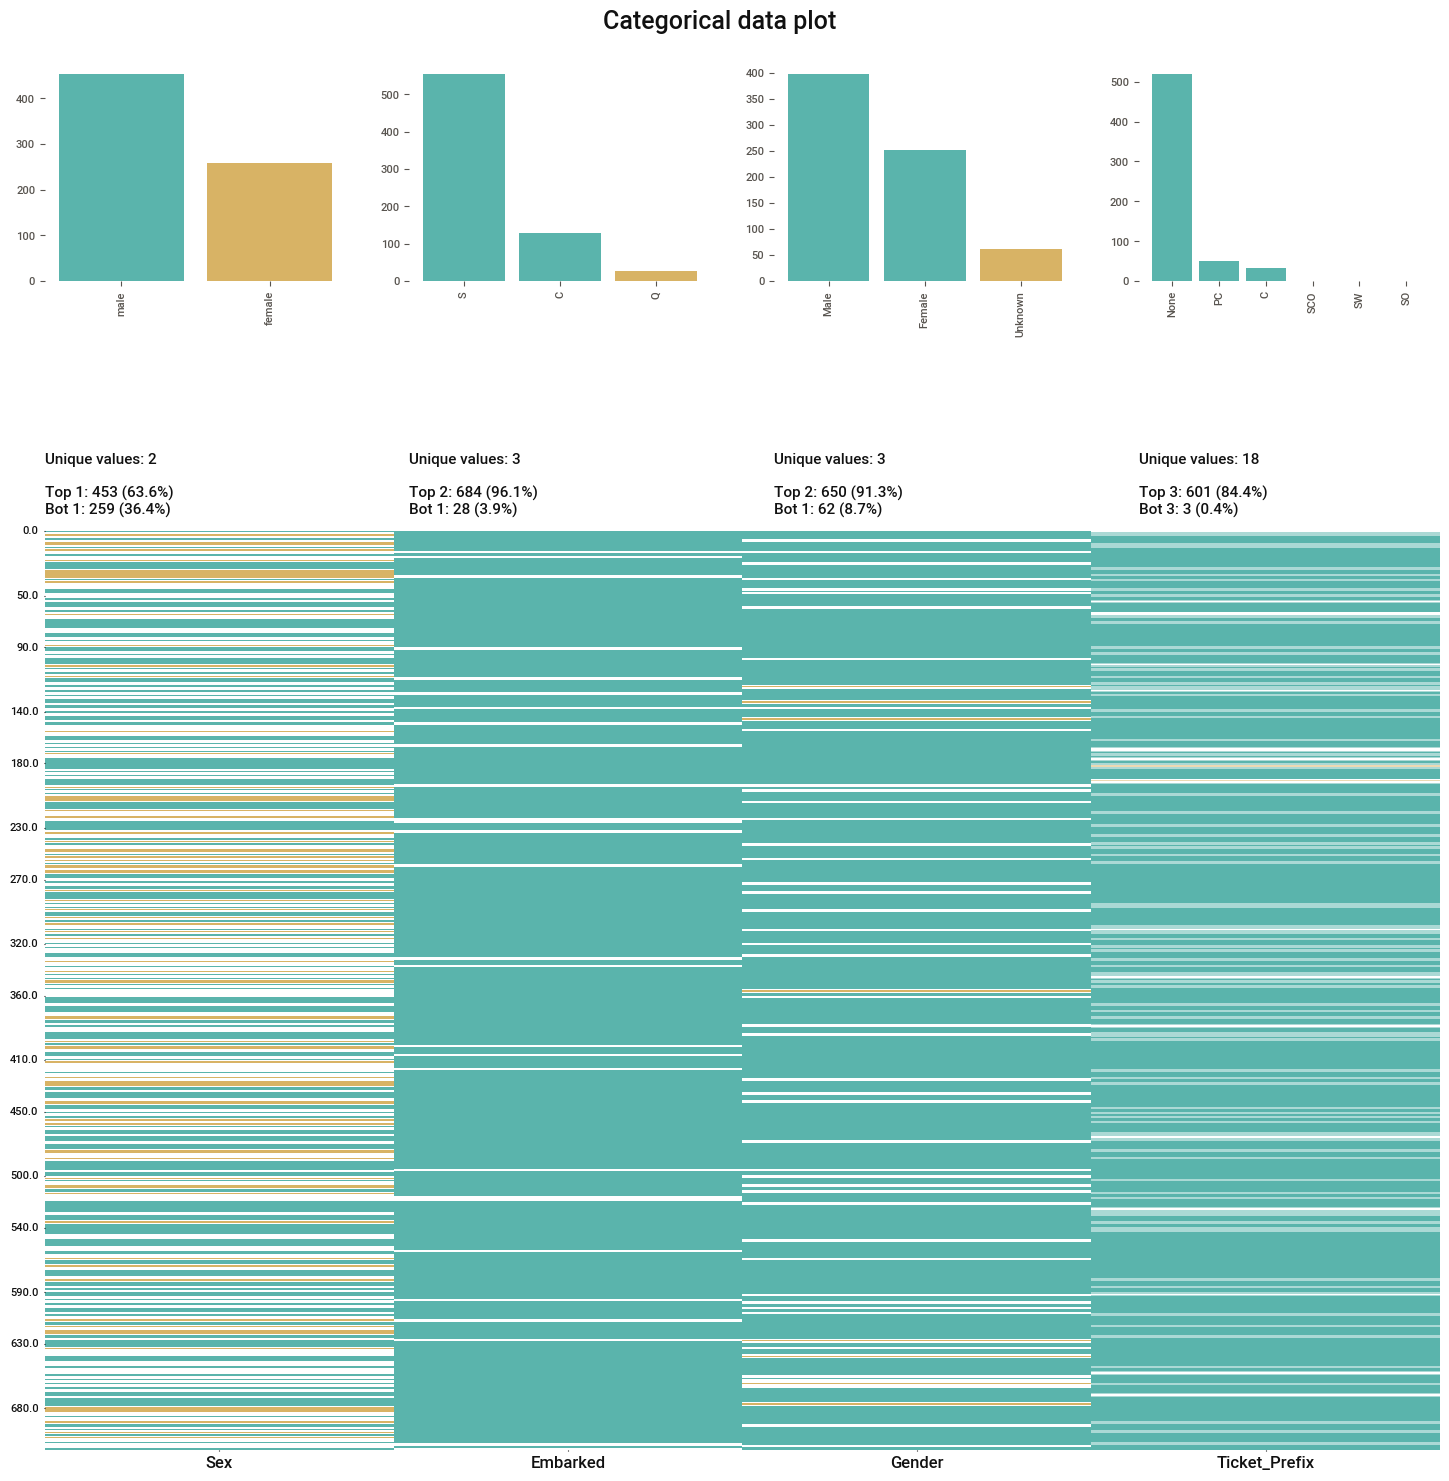

In [100]:
import klib  as klib

klib.cat_plot(df)

In [101]:
klib.corr_interactive_plot(df)

In [43]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [44]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   712 non-null    int64  
 1   PassengerId  712 non-null    int64  
 2   Survived     712 non-null    int64  
 3   Pclass       712 non-null    int64  
 4   Name         712 non-null    object 
 5   Sex          712 non-null    object 
 6   Age          712 non-null    float64
 7   SibSp        712 non-null    int64  
 8   Parch        712 non-null    int64  
 9   Ticket       712 non-null    object 
 10  Fare         712 non-null    float64
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 66.9+ KB


In [46]:
import pandas as pd


# Assuming your DataFrame is named df

# Get list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Categorical Columns:
['Name', 'Sex', 'Ticket', 'Embarked']


In [47]:
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
707,"Rice, Mrs. William (Margaret Norton)"
708,"Montvila, Rev. Juozas"
709,"Graham, Miss. Margaret Edith"
710,"Behr, Mr. Karl Howell"


In [48]:
def categorize_gender(name):
    if 'Mr.' in name:
        return 'Male'
    elif 'Mrs.' in name or 'Miss.' in name:
        return 'Female'
    else:
        return 'Unknown'

df['Gender'] = df['Name'].apply(categorize_gender)


In [49]:
df.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Male
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Female


In [ ]:
df[['Unnamed: 0', 'PassengerId']]

In [52]:
df.drop(['Unnamed: 0', 'PassengerId', 'Name'], axis=1, inplace=True)


In [53]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Male
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Female


In [55]:
import pandas as pd


# Assuming your DataFrame is named df

# Get list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Categorical Columns:
['Sex', 'Ticket', 'Embarked', 'Gender']


In [56]:
# Find unique categories in each categorical column

for column in categorical_columns:
    unique_categories = df[column].unique()
    print(f"Unique categories in '{column}':")
    print(unique_categories)
    print()

Unique categories in 'Sex':
['male' 'female']

Unique categories in 'Ticket':
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '17463'
 '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151' '347082'
 '350406' '248706' '382652' '345763' '239865' '248698' '330923' '113788'
 '347077' '19950' 'PC 17601' 'C.A. 24579' 'PC 17604' '113789' 'A./5. 2152'
 '345764' '2651' '7546' '11668' 'SC/Paris 2123' '330958' '349237'
 '3101295' 'A/4. 39886' 'PC 17572' '2926' '113509' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '36973' '347088' 'C.A. 29395' 'S.P. 3464'
 '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879' '2680' '1601' '348123'
 '248738' '364516' '345767' '345779' '113059' 'SO/C 14885' '3101278'
 'W./C. 6608' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' 'PC 17754' 'PC 17759' '231919' '244367' '349245' '35281' '7540'
 '3101276' '349207' '343120' '349249' '110465' '2665' '324669' '4136'
 '2627' 'STON/O 2. 3101294' '370369' 'PC 17558' '27267' 'C 17369' '347061'
 

In [57]:
df['Ticket_Prefix'] = df['Ticket'].str.extract(r'([A-Za-z]+)', expand=False)
df['Ticket_Prefix'].fillna('None', inplace=True)  # Fill missing values with 'None'


In [58]:
df['Ticket_Prefix']

,Ticket_Prefix
0,A
1,PC
2,STON
3,None
4,None
...,...
707,None
708,None
709,None
710,None


In [59]:
ticket_mapping = {
    'PC': 'Special',
    'C': 'Special',
    'A': 'Regular',
    'STON/O': 'Regular',
    'SOTON/OQ': 'Regular',
    'SOTON/O': 'Regular',
    'SC': 'Special',
    'W/C': 'Special',
    'F.C.C.': 'Special',
    'PP': 'Special',
    'None': 'None'
    # Add more mappings based on your specific grouping criteria
}

df['Ticket_Group'] = df['Ticket_Prefix'].map(ticket_mapping)
df['Ticket_Group'].fillna('Regular', inplace=True)  # Fill unmapped prefixes as 'Regular'


In [60]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Ticket_Prefix,Ticket_Group
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Male,A,Regular
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Female,PC,Special


In [61]:
set(df['Ticket_Group'])

{'None', 'Regular', 'Special'}

In [65]:
df.drop('Ticket_Group' , inplace=True, axis=1)

<ipython-input-62-349a5fd085b5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ticket_Group', data=df, palette='viridis')


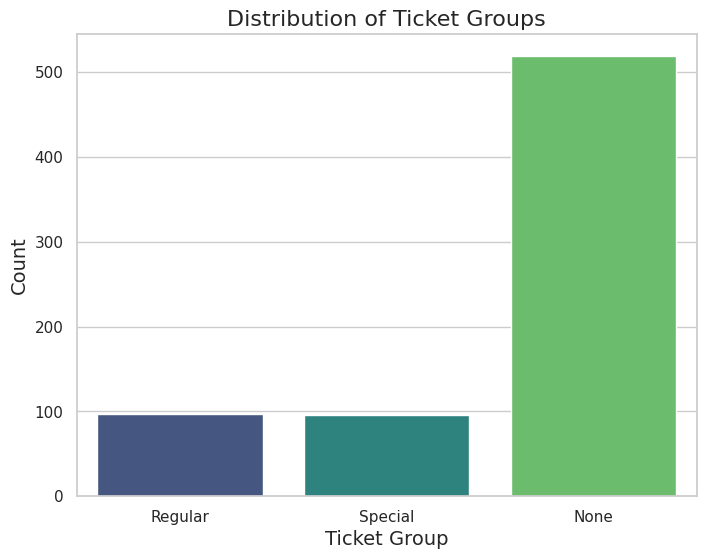

In [62]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Ticket_Group', data=df, palette='viridis')

# Add titles and labels
plt.title('Distribution of Ticket Groups', fontsize=16)
plt.xlabel('Ticket Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


In [67]:
df.drop('Ticket' , inplace=True, axis=1)

In [68]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Ticket_Prefix
0,0,3,male,22.0,1,0,7.2500,S,Male,A
1,1,1,female,38.0,1,0,71.2833,C,Female,PC


In [69]:
len(df)

712

In [70]:
X = df.drop(columns=['Survived'],axis=1)

In [71]:
y = df['Survived']

TypeError: cannot concatenate object of type '<class 'scipy.sparse._csr.csr_matrix'>'; only Series and DataFrame objs are valid

In [72]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [73]:
numerical_cols

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [74]:
categorical_cols

Index(['Sex', 'Embarked', 'Gender', 'Ticket_Prefix'], dtype='object')

In [75]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [76]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [77]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [78]:
X = preprocessor.fit_transform(X)

In [79]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((569, 31), (143, 31))

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Encode target variable y
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)
# y_test= label_encoder.transform(y_test)

In [80]:
def evaluate_model(true, predicted):
    # Calculate classification accuracy
    accuracy = accuracy_score(true, predicted)

    # Calculate precision, recall, and F1-score for each class
    precision = precision_score(true, predicted, average='macro')
    recall = recall_score(true, predicted, average='macro')
    f1 = f1_score(true, predicted, average='macro')

    # Calculate confusion matrix
    cm = confusion_matrix(true, predicted)

    return accuracy, precision, recall, f1, cm

In [81]:
models = {
    "LogisticRegression":  LogisticRegression(),
    "SVC": SVC(),
    "RidgeClassifier": RidgeClassifier(),
    "KNeighborsClassifier":  KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=False),
    "AdaBoostClassifier": AdaBoostClassifier()
}
model_list = []
accuracy_list =[]
precision_list = []
recall_list = []
f1_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1, model_train_cm = evaluate_model(y_train, y_train_pred)

    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1, model_test_cm = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Confusion Matrix:\n", model_train_cm)

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Confusion Matrix:\n", model_test_cm)

    accuracy_list.append(model_test_accuracy)

    print('='*35)
    print('\n')

LogisticRegression
Model performance for Training set
- Accuracy: 0.8278
- Precision: 0.8233
- Recall: 0.8130
- F1 Score: 0.8172
- Confusion Matrix:
 [[304  40]
 [ 58 167]]
----------------------------------
Model performance for Test set
- Accuracy: 0.8112
- Precision: 0.8130
- Recall: 0.8026
- F1 Score: 0.8057
- Confusion Matrix:
 [[70 10]
 [17 46]]


SVC
Model performance for Training set
- Accuracy: 0.8453
- Precision: 0.8468
- Recall: 0.8267
- F1 Score: 0.8340
- Confusion Matrix:
 [[315  29]
 [ 59 166]]
----------------------------------
Model performance for Test set
- Accuracy: 0.8252
- Precision: 0.8277
- Recall: 0.8168
- F1 Score: 0.8201
- Confusion Matrix:
 [[71  9]
 [16 47]]


RidgeClassifier
Model performance for Training set
- Accuracy: 0.8190
- Precision: 0.8126
- Recall: 0.8057
- F1 Score: 0.8087
- Confusion Matrix:
 [[299  45]
 [ 58 167]]
----------------------------------
Model performance for Test set
- Accuracy: 0.8042
- Precision: 0.8095
- Recall: 0.7930
- F1 Score:

In [82]:

pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'accuracy']).sort_values(by=["accuracy"],ascending=False)

,Model Name,accuracy
1,SVC,0.825175
6,CatBoostClassifier,0.825175
0,LogisticRegression,0.811189
7,AdaBoostClassifier,0.811189
2,RidgeClassifier,0.804196
5,XGBClassifier,0.790210
3,KNeighborsClassifier,0.776224
4,DecisionTreeClassifier,0.769231


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [84]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='macro')
    recall = recall_score(true, predicted, average='macro')
    f1 = f1_score(true, predicted, average='macro')
    cm = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1, cm

In [85]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    "LogisticRegression": {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "SVC": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "RidgeClassifier": {
        'alpha': [0.1, 1, 10, 100]
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "DecisionTreeClassifier": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBClassifier": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "CatBoostClassifier": {
        'iterations': [100, 200],
        'depth': [6, 10],
        'learning_rate': [0.01, 0.1],
        'l2_leaf_reg': [1, 3]
    },
    "AdaBoostClassifier": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1]
    }
}


In [86]:
models = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "RidgeClassifier": RidgeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=False),
    "AdaBoostClassifier": AdaBoostClassifier()
}


In [87]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for name, model in models.items():
    print(f"Hyperparameter tuning for {name}...")

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Print best parameters
    print("Best parameters:", grid_search.best_params_)

    # Make predictions with the best model
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1, model_train_cm = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1, model_test_cm = evaluate_model(y_test, y_test_pred)

Hyperparameter tuning for LogisticRegression...
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Hyperparameter tuning for SVC...
Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Hyperparameter tuning for RidgeClassifier...
Best parameters: {'alpha': 10}
Hyperparameter tuning for KNeighborsClassifier...
Best parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Hyperparameter tuning for DecisionTreeClassifier...
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Hyperparameter tuning for XGBClassifier...
Best parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Hyperparameter tuning for CatBoostClassifier...
Best parameters: {'depth': 10, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Hyperparameter tuning for AdaBoostClassifier...
Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [89]:
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Confusion Matrix:\n", model_train_cm)

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Confusion Matrix:\n", model_test_cm)

    accuracy_list.append(model_test_accuracy)

    print('='*35)
    print('\n')


Model performance for Training set
- Accuracy: 0.8137
- Precision: 0.8065
- Recall: 0.8013
- F1 Score: 0.8036
- Confusion Matrix:
 [[296  48]
 [ 58 167]]
----------------------------------
Model performance for Test set
- Accuracy: 0.7692
- Precision: 0.7690
- Recall: 0.7600
- F1 Score: 0.7625
- Confusion Matrix:
 [[67 13]
 [20 43]]




In [90]:
# Create DataFrame for model performance
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'accuracy']).sort_values(by=["accuracy"], ascending=False)

,Model Name,accuracy


In [ ]:

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='macro')
    recall = recall_score(true, predicted, average='macro')
    f1 = f1_score(true, predicted, average='macro')
    cm = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1, cm

# Define parameter grids for hyperparameter tuning
param_grids = {
    "LogisticRegression": {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "SVC": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "RidgeClassifier": {
        'alpha': [0.1, 1, 10, 100]
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "DecisionTreeClassifier": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBClassifier": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "CatBoostClassifier": {
        'iterations': [100, 200],
        'depth': [6, 10],
        'learning_rate': [0.01, 0.1],
        'l2_leaf_reg': [1, 3]
    },
    "AdaBoostClassifier": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1]
    }
}

models = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "RidgeClassifier": RidgeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=False),
    "AdaBoostClassifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for name, model in models.items():
    print(f"Hyperparameter tuning for {name}...")

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Print best parameters
    print("Best parameters:", grid_search.best_params_)

    # Make predictions with the best model
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1, model_train_cm = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1, model_test_cm = evaluate_model(y_test, y_test_pred)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Confusion Matrix:\n", model_train_cm)

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Confusion Matrix:\n", model_test_cm)

    accuracy_list.append(model_test_accuracy)

    print('='*35)
    print('\n')

# Create DataFrame for model performance
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'accuracy']).sort_values(by=["accuracy"], ascending=False)


In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv('E:\\co2_emssion\\notebook\\data\\FuelConsumption_modified.csv')

In [ ]:
df.columns


Index(['YEAR', 'MAKE', 'ENGINE_SIZE', 'CYLINDERS', 'FUEL', 'FUEL_CONSUMPTION',
       'HWY_L_PER_100KM', 'COMB_L_PER_100KM', 'COMB_MPG', 'CO2_EMISSIONS',
       'BROAD_VEHICLE_CLASS', 'TRANSMISSION_GROUP'],
      dtype='object')

#### Show Top 5 Records

In [ ]:
df.head()

,YEAR,MAKE,ENGINE_SIZE,CYLINDERS,FUEL,FUEL_CONSUMPTION,HWY_L_PER_100KM,COMB_L_PER_100KM,COMB_MPG,CO2_EMISSIONS,BROAD_VEHICLE_CLASS,TRANSMISSION_GROUP
0,2000,BMW,2.5,6.0,Premium_gasoline,13.0,8.9,11.2,25.0,258.0,small_car,Basic Automatic
1,2000,BMW,2.5,6.0,Premium_gasoline,12.4,8.6,10.7,26.0,246.0,small_car,Manual
2,2000,BMW,2.5,6.0,Premium_gasoline,12.3,7.8,10.3,27.0,237.0,small_car,Basic Automatic
3,2000,BMW,2.5,6.0,Premium_gasoline,11.5,7.5,9.7,29.0,223.0,small_car,Manual
4,2000,BMW,2.5,6.0,Premium_gasoline,12.3,7.8,10.3,27.0,237.0,small_car,Basic Automatic


In [ ]:
df.columns

Index(['YEAR', 'MAKE', 'ENGINE SIZE', 'CYLINDERS', 'FUEL', 'FUEL CONSUMPTION',
       'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'CO2_EMISSIONS',
       'BROAD_VEHICLE_CLASS', 'TRANSMISSION_GROUP'],
      dtype='object')

In [ ]:
df['YEAR'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [ ]:
# # Remove rows with any null values
# df.dropna(inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 3889 non-null   int64  
 1   MAKE                 3889 non-null   object 
 2   ENGINE SIZE          3889 non-null   float64
 3   CYLINDERS            3889 non-null   float64
 4   FUEL                 3889 non-null   object 
 5   FUEL CONSUMPTION     3889 non-null   float64
 6   HWY (L/100 km)       3889 non-null   float64
 7   COMB (L/100 km)      3889 non-null   float64
 8   COMB (mpg)           3889 non-null   float64
 9   CO2_EMISSIONS        3889 non-null   float64
 10  BROAD_VEHICLE_CLASS  3889 non-null   object 
 11  TRANSMISSION_GROUP   3889 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 364.7+ KB


In [ ]:
df

,MAKE,ENGINE SIZE,CYLINDERS,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2_EMISSIONS,BROAD_VEHICLE_CLASS,TRANSMISSION_GROUP
0,BMW,2.5,6.0,Premium_gasoline,13.0,8.9,11.2,25.0,258.0,small_car,Basic Automatic
1,BMW,2.5,6.0,Premium_gasoline,12.4,8.6,10.7,26.0,246.0,small_car,Manual
2,BMW,2.5,6.0,Premium_gasoline,12.3,7.8,10.3,27.0,237.0,small_car,Basic Automatic
3,BMW,2.5,6.0,Premium_gasoline,11.5,7.5,9.7,29.0,223.0,small_car,Manual
4,BMW,2.5,6.0,Premium_gasoline,12.3,7.8,10.3,27.0,237.0,small_car,Basic Automatic
...,...,...,...,...,...,...,...,...,...,...,...
3884,Volvo,2.0,4.0,Premium_gasoline,10.7,7.7,9.4,30.0,219.0,other,Advanced Automatic
3885,Volvo,2.0,4.0,Premium_gasoline,10.5,8.1,9.4,30.0,219.0,other,Advanced Automatic
3886,Volvo,2.0,4.0,Premium_gasoline,11.0,8.7,9.9,29.0,232.0,other,Advanced Automatic
3887,Volvo,2.0,4.0,Premium_gasoline,11.5,8.4,10.1,28.0,236.0,other,Advanced Automatic


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df

# Get list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
['YEAR', 'ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION', 'HWY_L_PER_100KM', 'COMB_L_PER_100KM', 'COMB_MPG', 'CO2_EMISSIONS']

Categorical Columns:
['MAKE', 'FUEL', 'BROAD_VEHICLE_CLASS', 'TRANSMISSION_GROUP']


In [ ]:
# Find unique categories in each categorical column
for column in categorical_columns:
    unique_categories = df[column].unique()
    print(f"Unique categories in '{column}':")
    print(unique_categories)
    print()


Unique categories in 'MAKE':
['BMW' 'Audi' 'Ford' 'Honda' 'Hyundai' 'Jaguar' 'Land Rover' 'Lexus'
 'Mercedes-Benz' 'Porsche' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']

Unique categories in 'FUEL':
['Premium_gasoline' 'Diesel' 'Regular_gasoline' 'Ethanol']

Unique categories in 'BROAD_VEHICLE_CLASS':
['small_car' 'medium_car' 'large_car' 'other' 'pick_up_truck']

Unique categories in 'TRANSMISSION_GROUP':
['Basic Automatic' 'Manual' 'Standard Automatic' 'Automated Manual'
 'Advanced Automatic' 'CVT']



In [ ]:
X = df.drop(columns=['YEAR','CO2_EMISSIONS'],axis=1)   # iv


In [ ]:
y = df['CO2_EMISSIONS']

In [ ]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [ ]:
numerical_cols

Index(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)'],
      dtype='object')

In [ ]:
categorical_cols

Index(['MAKE', 'FUEL', 'BROAD_VEHICLE_CLASS', 'TRANSMISSION_GROUP'], dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3111, 35), (778, 35))

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.4030
- Mean Absolute Error: 1.4083
- R2 Score: 0.9978
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2208
- Mean Absolute Error: 1.3787
- R2 Score: 0.9980


Lasso
Model performance for Training set
- Root Mean Squared Error: 10.4576
- Mean Absolute Error: 5.6776
- R2 Score: 0.9580
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.6175
- Mean Absolute Error: 5.5556
- R2 Score: 0.9545


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.4336
- Mean Absolute Error: 1.4475
- R2 Score: 0.9977
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3118
- Mean Absolute Error: 1.4123
- R2 Score: 0.9978


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.8099
- Mean Absolute Error: 2.7413
- R2 Score: 0.9911
---------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.999148
5,Random Forest Regressor,0.999075
4,Decision Tree,0.998727
0,Linear Regression,0.998010
2,Ridge,0.997843
6,XGBRegressor,0.997056
3,K-Neighbors Regressor,0.982223
8,AdaBoost Regressor,0.960397
1,Lasso,0.954502


In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.80


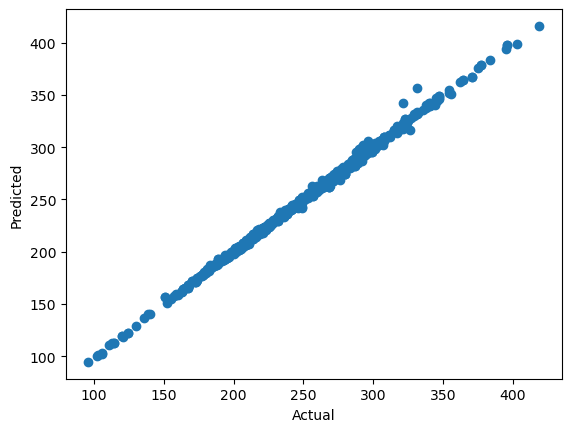

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

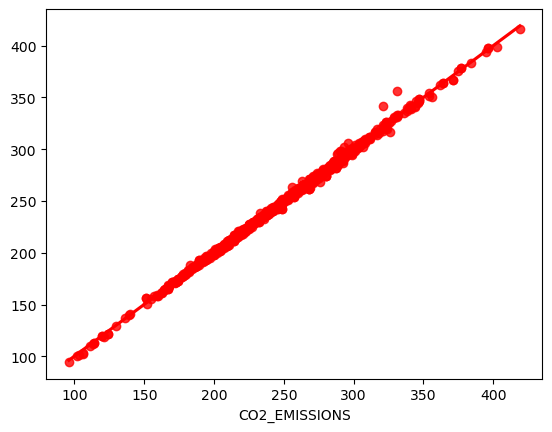

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
2392,233.0,232.887911,0.112089
2319,233.0,233.651032,-0.651032
2430,339.0,338.953202,0.046798
3697,354.0,354.322547,-0.322547
315,230.0,230.959701,-0.959701
...,...,...,...
2159,226.0,227.636832,-1.636832
2804,113.0,112.278305,0.721695
2771,279.0,280.018581,-1.018581
978,258.0,260.723739,-2.723739


In [ ]:
import os

# Define the path where you want to save the file
folder_path = "E:/CO2_EMSSION/notebook/data"
file_name = "FuelConsumption_modifiednew.csv"

# Concatenate the folder path and file name
file_path = os.path.join(folder_path, file_name)

# Save the DataFrame to CSV without the index
df.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")


File saved successfully at: E:/CO2_EMSSION/notebook/data\FuelConsumption_modifiednew.csv
